# Linear Regression: L1 vs L2
-------------------------------

This function shows how to use TensorFlow to solve linear regression via the matrix inverse.

It is important to know the effect of loss functions in algorithm convergence. Here we will illustrate how the L1 and L2 loss functions affect convergence in linear regression.  We will use the same iris data set as in the prior recipe, but we will change our loss functions and learning rates to see how convergence changes.

<img src="../images/04_L1_L2_learningrates.png" width="512">

We start by loading the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# L1-Loss
--------------

Here, we will illustrate linear regression with the L1-Loss. Later in this script, we will illustrate the same problem with L2-Loss.

The equation for the L1 Loss for Linear Least Squares is

$$S = \sum_{i=1}^{N}\left| y_{i} - \hat{y_{i}} \right|$$

Where $N$ is the number of data points, $y_{i}$ is the i-th actual y-values, $\hat{y_{i}}$ is the predicted i-th y-value.

We start a computational graph session.

In [2]:
sess = tf.Session()

Now we load the Iris data.

In [3]:
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

Set some model parameters.

An important parameter to take note of is the learning rate.  If the learning rate is too large, the model will not converge.  If the learning rate is too small the model will converge too slowly.

Here are two learning rate values to show convergence and non-convergence.

Convergence happens below 0.35, try setting the learning rate less than that for convergence.  To illustrate non-convergence, set the learning rate to 0.4 or higher.

In [4]:
batch_size = 25
learning_rate = 0.1 # Will not converge with learning rate at 0.4
iterations = 50

Now we can initialize placeholders, model variables, and model operations.

In [5]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

Next, we declare the l1-loss function and the optimization function.  After that we initialize the model variables.

In [6]:
# Declare loss functions
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

# Declare optimizers
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we start the training loop.

In [7]:
# Training loop
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[2.6010015]] b = [[1.6213728]]
Step #50 A = [[2.4362016]] b = [[2.4893732]]


# L2-Loss
--------

Here, we will illustrate linear regression with the L2-Loss..

The equation for the L2 Loss for Linear Least Squares is

$$S = \sum_{i=1}^{N}\left( y_{i} - \hat{y_{i}} \right)^{2}$$

Where $N$ is the number of data points, $y_{i}$ is the i-th actual y-values, $\hat{y_{i}}$ is the predicted i-th y-value.

We start a computational graph session.

In [8]:
# L2 Loss
# Reinitialize graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

Same as before, we initialize the placeholders, variables, and model operations.

In [9]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

# Declare model operations
model_output = tf.add(tf.matmul(x_data, A), b)

Here is the loss function, variable initialization, and optimization functions.

In [10]:
# Declare loss functions
loss_l2 = tf.reduce_mean(tf.square(y_target - model_output))

# Declare optimizers
my_opt_l2 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l2 = my_opt_l2.minimize(loss_l2)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

Now we can start our linear regression training with the L2 function.

In [11]:
loss_vec_l2 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l2 = sess.run(loss_l2, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l2.append(temp_loss_l2)
    if (i+1)%25==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))

Step #25 A = [[1.9620544]] b = [[3.0439415]]
Step #50 A = [[1.2921276]] b = [[4.21144]]


Here is matplotlib code to plot the loss for the L1 and L2 loss functions applied to the same linear regression problem.

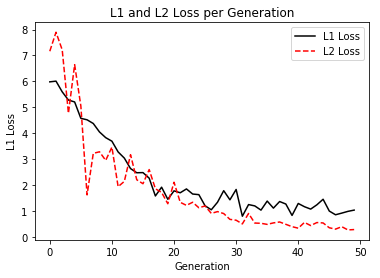

In [12]:
# Plot loss over time
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec_l2, 'r--', label='L2 Loss')
plt.title('L1 and L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

tested; Gopal